In [145]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

In [91]:
raw_data = pd.read_pickle("data_bio482.pkl")

In [93]:
data_processed = raw_data.drop(["Sweep_PassiveContactTimes", "Sweep_ActiveContactTimes"], axis=1)
data_processed

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Mouse_Sex,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
2,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,3.0,"[-0.041896875, -0.0419125, -0.041909375, -0.04...",20000.0,"[[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]",2005.0,passive contact,"[1.4958937492820894, 1.5019819900587095, 1.509...",100.0,"[[2.15, 3.652], [4.362, 5.848]]"
3,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,23.0,"[-0.059725001, -0.0597375, -0.059731249, -0.05...",20000.0,"[[0.002, 10.728], [17.854, 20.0]]",2015.0,free whisking,"[-139.2381, -139.2381, -139.2381, -139.2381, -...",100.0,"[11.022, 16.274]"
827,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,24.0,"[-0.058984376, -0.058984376, -0.058990624, -0....",20000.0,"[[0.002, 0.238], [1.162, 3.608], [4.906, 6.216...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.264, 1.158], [3.694, 4.776], [8.728, 9.896..."
828,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,25.0,"[-0.053018749, -0.05298125, -0.05300625, -0.05...",20000.0,"[[0.002, 1.74], [1.844, 6.52], [6.532, 9.15], ...",2015.0,free whisking,"[-150.0723, -150.0723, -150.0723, -150.0723, -...",100.0,"[[9.166, 9.878], [10.358, 12.526], [12.958, 13..."
829,20.0,nan,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,26.0,"[-0.049796876, -0.049843751, -0.049878124, -0....",20000.0,"[[0.002, 0.146], [0.53, 1.858], [2.408, 3.664]...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.222, 0.526], [1.892, 2.404], [3.692, 3.818..."


In [95]:
columns_with_arrays = [
    "Sweep_MembranePotential",
    "Sweep_QuietTimes",
    "Sweep_WhiskerAngle",
    "Sweep_WhiskingTimes",
]

In [101]:
data_processed[data_processed.columns.difference(columns_with_arrays)] = data_processed[data_processed.columns.difference(columns_with_arrays)].replace('nan', np.nan)

In [102]:
data_processed

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Mouse_Sex,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
2,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,3.0,"[-0.041896875, -0.0419125, -0.041909375, -0.04...",20000.0,"[[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]",2005.0,passive contact,"[1.4958937492820894, 1.5019819900587095, 1.509...",100.0,"[[2.15, 3.652], [4.362, 5.848]]"
3,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,m,5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,23.0,"[-0.059725001, -0.0597375, -0.059731249, -0.05...",20000.0,"[[0.002, 10.728], [17.854, 20.0]]",2015.0,free whisking,"[-139.2381, -139.2381, -139.2381, -139.2381, -...",100.0,"[11.022, 16.274]"
827,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,24.0,"[-0.058984376, -0.058984376, -0.058990624, -0....",20000.0,"[[0.002, 0.238], [1.162, 3.608], [4.906, 6.216...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.264, 1.158], [3.694, 4.776], [8.728, 9.896..."
828,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,25.0,"[-0.053018749, -0.05298125, -0.05300625, -0.05...",20000.0,"[[0.002, 1.74], [1.844, 6.52], [6.532, 9.15], ...",2015.0,free whisking,"[-150.0723, -150.0723, -150.0723, -150.0723, -...",100.0,"[[9.166, 9.878], [10.358, 12.526], [12.958, 13..."
829,20.0,NaN,1.0,196.0,AP068_1,L2/3,C2,SST,True,2015.0,...,m,26.0,"[-0.049796876, -0.049843751, -0.049878124, -0....",20000.0,"[[0.002, 0.146], [0.53, 1.858], [2.408, 3.664]...",2015.0,free whisking,"[-144.9738, -144.9738, -144.9738, -145.6111, -...",100.0,"[[0.222, 0.526], [1.892, 2.404], [3.692, 3.818..."


In [103]:
data_free_whisking = data_processed[data_processed['Sweep_Type']=='free whisking']

<Axes: >

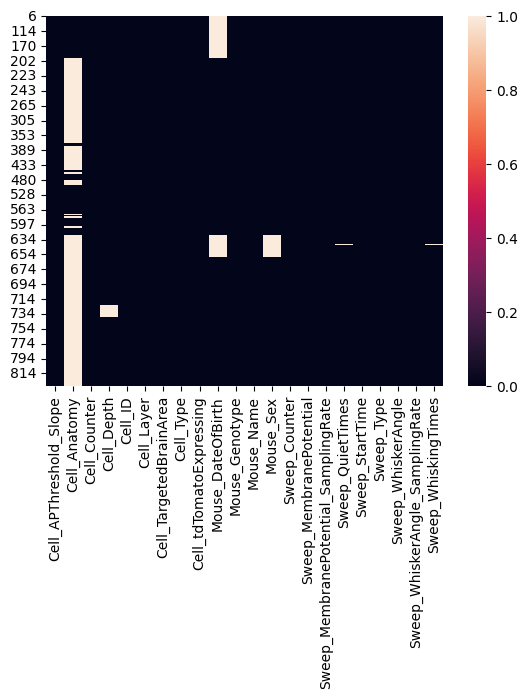

In [104]:
sns.heatmap(data_free_whisking.isna())

In [136]:
np.unique(data_free_whisking['Cell_APThreshold_Slope'])

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.])

In [120]:
questionable_predictors = [
    # 'Cell_APThreshold_Slope',
    'Cell_Anatomy',
    'Cell_Counter',
    # 'Cell_Depth',
    'Cell_ID',
    # 'Cell_Layer',
    'Cell_TargetedBrainArea',
    # 'Cell_Type',
    # 'Cell_tdTomatoExpressing',
    'Mouse_DateOfBirth',
    'Mouse_Genotype',
    'Mouse_Name',
    'Mouse_Sex',
    'Sweep_Counter',
    'Sweep_MembranePotential', # Array
    'Sweep_MembranePotential_SamplingRate',
    'Sweep_QuietTimes', # Array
    'Sweep_StartTime',
    'Sweep_Type',
    'Sweep_WhiskerAngle', # Array
    'Sweep_WhiskerAngle_SamplingRate',
    'Sweep_WhiskingTimes' # Array
]

In [121]:
keep_predictors = [
    'Cell_APThreshold_Slope',
    # 'Cell_Anatomy',
    # 'Cell_Counter',
    'Cell_Depth',
    # 'Cell_ID',
    'Cell_Layer',
    # 'Cell_TargetedBrainArea',
    'Cell_Type',
    'Cell_tdTomatoExpressing',
    # 'Mouse_DateOfBirth',
    # 'Mouse_Genotype',
    # 'Mouse_Name',
    # 'Mouse_Sex',
    # 'Sweep_Counter',
    # 'Sweep_MembranePotential', # Array
    # 'Sweep_MembranePotential_SamplingRate',
    # 'Sweep_QuietTimes', # Array
    # 'Sweep_StartTime',
    # 'Sweep_Type',
    # 'Sweep_WhiskerAngle', # Array
    # 'Sweep_WhiskerAngle_SamplingRate',
    # 'Sweep_WhiskingTimes' # Array
]

In [127]:
data_free_whisking_preprocessed = data_free_whisking[keep_predictors]
data_free_whisking_preprocessed

,Cell_APThreshold_Slope,Cell_Depth,Cell_Layer,Cell_Type,Cell_tdTomatoExpressing
6,10.0,229.0,L2/3,EXC,False
7,10.0,350.0,L2/3,EXC,False
8,10.0,350.0,L2/3,EXC,False
9,10.0,350.0,L2/3,EXC,False
13,10.0,244.0,L2/3,EXC,False
...,...,...,...,...,...
826,20.0,196.0,L2/3,SST,True
827,20.0,196.0,L2/3,SST,True
828,20.0,196.0,L2/3,SST,True
829,20.0,196.0,L2/3,SST,True


<Axes: >

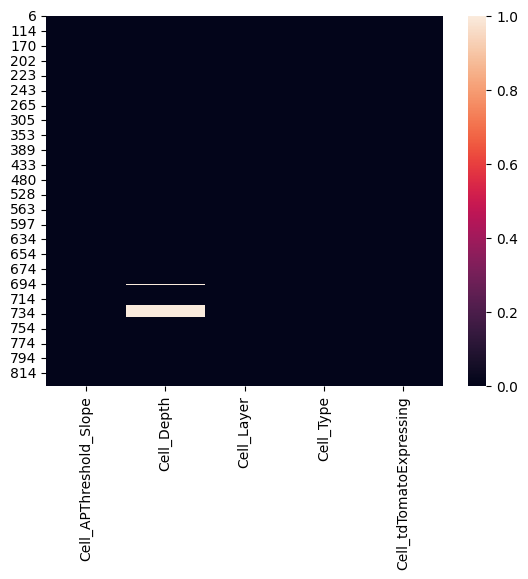

In [129]:
sns.heatmap(data_free_whisking_preprocessed.isna())

<Axes: ylabel='Cell_Depth'>

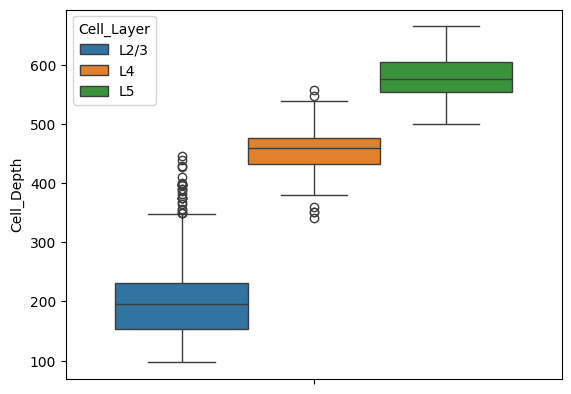

In [131]:
sns.boxplot(
    data=data_free_whisking_preprocessed,
    y="Cell_Depth",
    hue="Cell_Layer"
)

In [132]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


In [133]:
imp.fit_transform([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

array([[ 1.        ,  2.        ],
       [ 3.        ,  6.        ],
       [ 4.        ,  8.        ],
       [ 1.50004509,  3.        ],
       [ 7.        , 14.00004135]])

In [138]:
data_free_whisking_preprocessed

,Cell_APThreshold_Slope,Cell_Depth,Cell_Layer,Cell_Type,Cell_tdTomatoExpressing
6,10.0,229.0,L2/3,EXC,False
7,10.0,350.0,L2/3,EXC,False
8,10.0,350.0,L2/3,EXC,False
9,10.0,350.0,L2/3,EXC,False
13,10.0,244.0,L2/3,EXC,False
...,...,...,...,...,...
826,20.0,196.0,L2/3,SST,True
827,20.0,196.0,L2/3,SST,True
828,20.0,196.0,L2/3,SST,True
829,20.0,196.0,L2/3,SST,True


In [148]:
column_transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop="if_binary"), ["Cell_tdTomatoExpressing", "Cell_Layer"]),
    (MinMaxScaler(), ["Cell_APThreshold_Slope", "Cell_Depth"]),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)
column_transformer.set_output(transform="pandas")
remove_constants = VarianceThreshold(threshold=0.05)
remove_constants.set_output(transform="pandas")

# preprocess_pipe = Pipeline(
#     (
#         ("ohe+scaling", column_transformer),
#         ("var_thresh", remove_constants),
#     )
# )

VarianceThreshold(threshold=0.05)

In [155]:
cell_depth_imputer = IterativeImputer(max_iter=10, random_state=0)
cell_depth_imputer.set_output(transform="pandas")

IterativeImputer(random_state=0)

In [156]:
ohe_scaling = column_transformer.fit_transform(data_free_whisking_preprocessed)
ohe_scaling

,Cell_tdTomatoExpressing_True,Cell_Layer_L2/3,Cell_Layer_L4,Cell_Layer_L5,Cell_APThreshold_Slope,Cell_Depth,Cell_Type
6,0.0,1.0,0.0,0.0,0.25,0.232394,EXC
7,0.0,1.0,0.0,0.0,0.25,0.445423,EXC
8,0.0,1.0,0.0,0.0,0.25,0.445423,EXC
9,0.0,1.0,0.0,0.0,0.25,0.445423,EXC
13,0.0,1.0,0.0,0.0,0.25,0.258803,EXC
...,...,...,...,...,...,...,...
826,1.0,1.0,0.0,0.0,0.50,0.174296,SST
827,1.0,1.0,0.0,0.0,0.50,0.174296,SST
828,1.0,1.0,0.0,0.0,0.50,0.174296,SST
829,1.0,1.0,0.0,0.0,0.50,0.174296,SST


In [161]:
ohe_scaling_filled = cell_depth_imputer.fit_transform(ohe_scaling.drop('Cell_Type', axis=1))
ohe_scaling_filled['Cell_Type'] = ohe_scaling['Cell_Type']
ohe_scaling_filled

,Cell_tdTomatoExpressing_True,Cell_Layer_L2/3,Cell_Layer_L4,Cell_Layer_L5,Cell_APThreshold_Slope,Cell_Depth,Cell_Type
6,0.0,1.0,0.0,0.0,0.25,0.232394,EXC
7,0.0,1.0,0.0,0.0,0.25,0.445423,EXC
8,0.0,1.0,0.0,0.0,0.25,0.445423,EXC
9,0.0,1.0,0.0,0.0,0.25,0.445423,EXC
13,0.0,1.0,0.0,0.0,0.25,0.258803,EXC
...,...,...,...,...,...,...,...
826,1.0,1.0,0.0,0.0,0.50,0.174296,SST
827,1.0,1.0,0.0,0.0,0.50,0.174296,SST
828,1.0,1.0,0.0,0.0,0.50,0.174296,SST
829,1.0,1.0,0.0,0.0,0.50,0.174296,SST


In [166]:
pca = PCA()
pca.set_output(transform="pandas")
pca_data = pca.fit_transform(ohe_scaling_filled.drop('Cell_Type', axis=1))
pca_data['Cell_Type'] = ohe_scaling_filled['Cell_Type']
pca_data

,pca0,pca1,pca2,pca3,pca4,pca5,Cell_Type
6,-0.382386,0.801558,0.005674,-0.019395,-0.038723,-2.356153e-15,EXC
7,-0.308922,0.821307,0.068209,0.038684,0.141027,5.347496e-15,EXC
8,-0.308922,0.821307,0.068209,0.038684,0.141027,1.464431e-14,EXC
9,-0.308922,0.821307,0.068209,0.038684,0.141027,-2.471635e-16,EXC
13,-0.373279,0.804006,0.013426,-0.012195,-0.016440,-1.288481e-16,EXC
...,...,...,...,...,...,...,...
826,-0.366061,-0.225739,-0.047376,0.061717,-0.009131,6.239412e-17,SST
827,-0.366061,-0.225739,-0.047376,0.061717,-0.009131,6.239412e-17,SST
828,-0.366061,-0.225739,-0.047376,0.061717,-0.009131,6.239412e-17,SST
829,-0.366061,-0.225739,-0.047376,0.061717,-0.009131,6.239412e-17,SST


<Axes: xlabel='pca0', ylabel='pca1'>

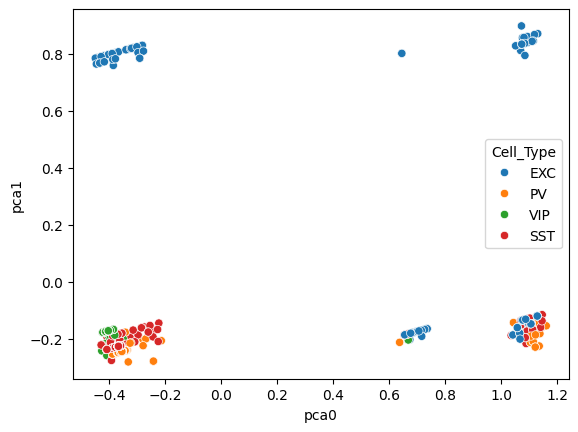

In [168]:
sns.scatterplot(
    data=pca_data,
    x='pca0',
    y='pca1',
    hue='Cell_Type'
)